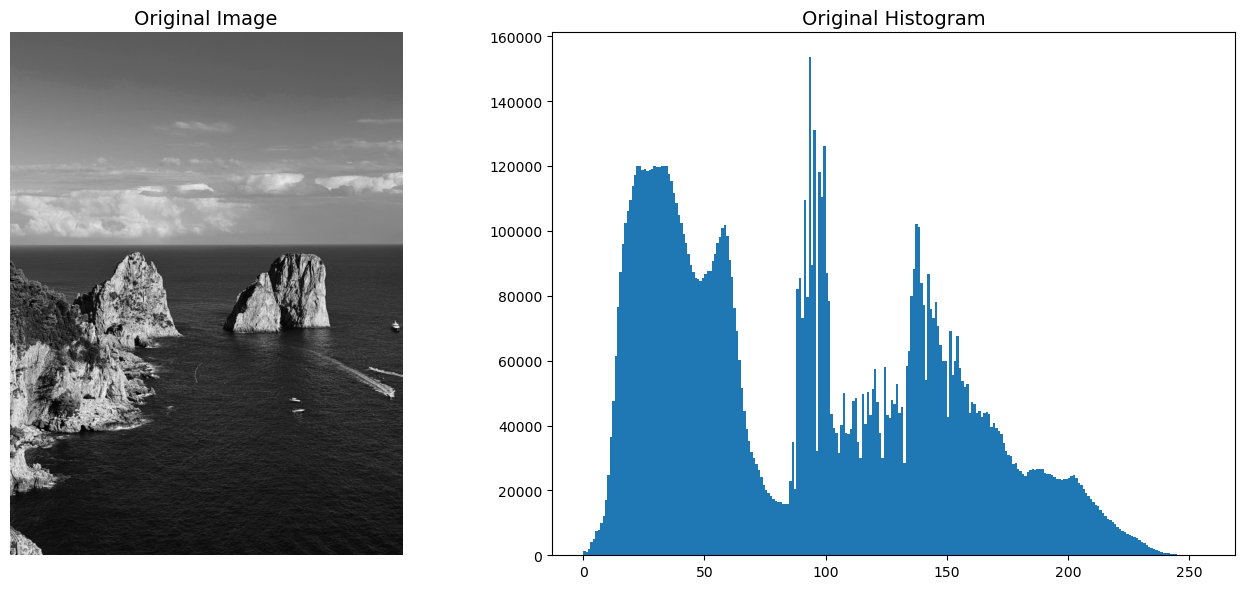

In [71]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("capri.jpg", cv2.IMREAD_GRAYSCALE)
img_eq = cv2.equalizeHist(img)

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image", fontsize=14)
plt.axis("off")

plt.subplot(1,2,2)
plt.hist(img.ravel(), bins=256, range=[0,256])
plt.title("Original Histogram", fontsize=14)

plt.tight_layout()
plt.show()




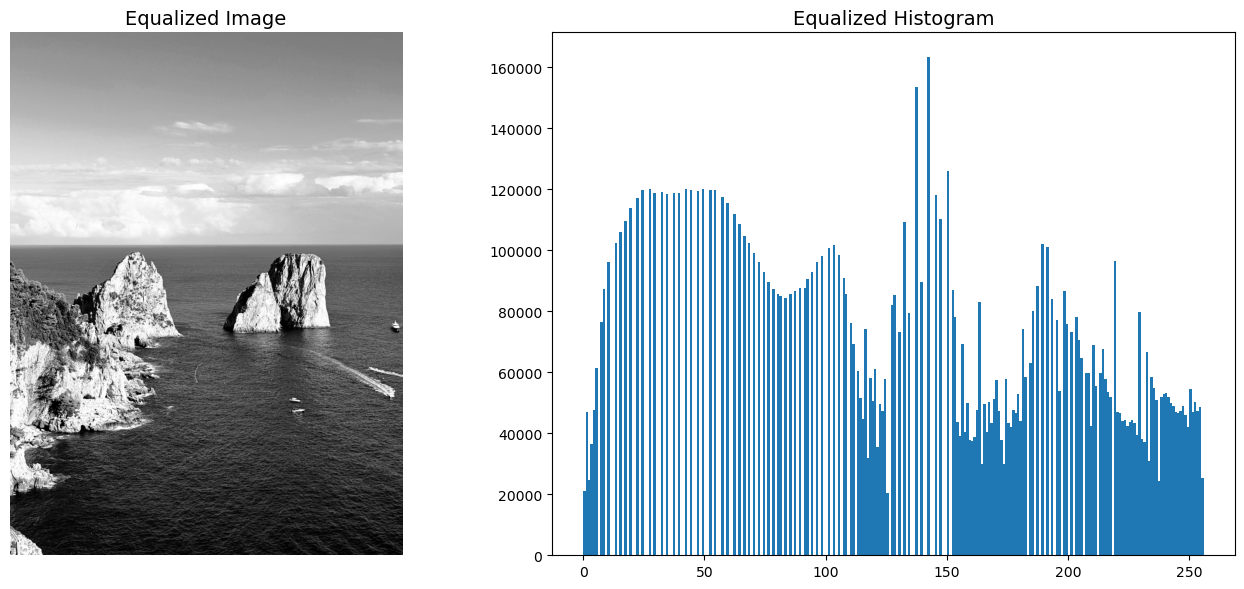

In [72]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.imshow(img_eq, cmap='gray')
plt.title("Equalized Image", fontsize=14)
plt.axis("off")

plt.subplot(1,2,2)
plt.hist(img_eq.ravel(), bins=256, range=[0,256])
plt.title("Equalized Histogram", fontsize=14)

plt.tight_layout()
plt.show()

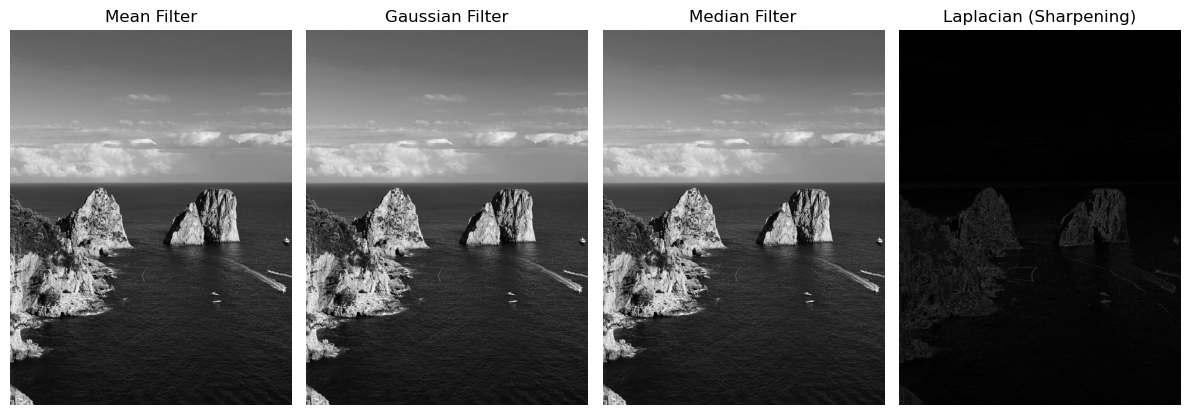

In [73]:
mean = cv2.blur(img, (3,3))
gaussian = cv2.GaussianBlur(img, (5,5), 1.0)
median = cv2.medianBlur(img, 3)
laplacian = cv2.Laplacian(img, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))

plt.figure(figsize=(12,6))
filters = [mean, gaussian, median, laplacian]
titles = ["Mean Filter", "Gaussian Filter", "Median Filter", "Laplacian (Sharpening)"]

for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(filters[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()

(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

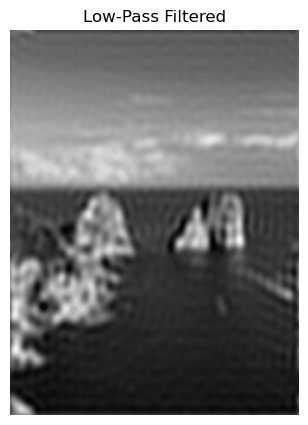

In [74]:
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
crow, ccol = rows//2 , cols//2
r = 30
mask_low = np.zeros((rows, cols, 2), np.uint8)
cv2.circle(mask_low, (ccol, crow), r, (1,1), -1)
mask_high = 1 - mask_low

low_pass = dft_shift * mask_low
f_ishift = np.fft.ifftshift(low_pass)
img_low = cv2.idft(f_ishift)
img_low = cv2.magnitude(img_low[:,:,0], img_low[:,:,1])
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_low, cmap='gray')
plt.title("Low-Pass Filtered")
plt.axis("off")

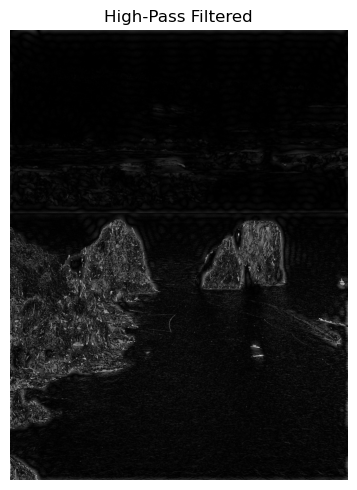

In [75]:
high_pass = dft_shift * mask_high
f_ishift = np.fft.ifftshift(high_pass)
img_high = cv2.idft(f_ishift)
img_high = cv2.magnitude(img_high[:,:,0], img_high[:,:,1])

plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.imshow(img_high, cmap='gray')
plt.title("High-Pass Filtered")
plt.axis("off")
plt.tight_layout()
plt.show()